# Linear Regression Model

# 1) importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import requests
import pickle

In [3]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
# for deep learning
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


## 2)- Loading data-files

In [5]:
df = pd.read_csv('testset3.csv')

In [6]:
df.head(2)

,Unnamed: 0,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25
0,0,0.111771,-0.019099,-0.076978,0.000673,-0.015912,0.123728,-0.126245,0.004603,-0.011020,...,-0.140342,-0.129376,-0.006367,0.033683,0.011117,0.161306,0.094439,-0.026443,-0.144413,-0.071164
1,1,-0.184091,0.216673,-0.014954,-0.069772,0.005479,0.353513,-0.011455,0.051448,0.042422,...,0.211127,-0.099469,-0.006718,-0.096733,-0.051730,0.172214,-0.066792,-0.051919,0.110749,0.077489


In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.shape

(80000, 25)

# 3)- Model Preparation

In [9]:
# Selecting all columns except last one that is 'm25'.

X = df.iloc[:,:-1].values          
y = df['m25'].values

In [10]:
X

array([[ 0.11177107, -0.01909882, -0.07697838, ...,  0.09443866,
        -0.02644323, -0.14441313],
       [-0.18409085,  0.21667293, -0.01495448, ..., -0.06679168,
        -0.05191859,  0.11074908],
       [ 0.00803504,  0.06207178, -0.24195565, ..., -0.06758451,
        -0.04307759, -0.15583268],
       ...,
       [ 0.0934768 , -0.15812533,  0.00374212, ..., -0.07949053,
         0.14883853,  0.03372341],
       [-0.04743269, -0.22715774,  0.13080734, ...,  0.18375071,
         0.13750756,  0.13749909],
       [ 0.05037231,  0.10659377,  0.10448148, ...,  0.00676053,
         0.31851738, -0.03230724]])

In [11]:
X.shape

(80000, 24)

In [12]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### normalize features

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)

### Split Data to Train and Test

In [14]:
# As it is neural network so, we tend to use capital letters for train & test sample
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.2)

In [15]:
print(type(X_Train))
print(type(X_Test))
print(type(Y_Train))
print(type(Y_Test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(64000, 24)
(16000, 24)
(64000,)
(16000,)


### reshape input

In [17]:
# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [18]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(64000, 1, 24)
(16000, 1, 24)
(64000,)
(16000,)


# 4)-Building Neural Network

In [19]:
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                15000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 15,051
Trainable params: 15,051
Non-trainable params: 0
_________________________________________________________________


### Fit model

In [21]:
history = model.fit(X_Train, Y_Train, epochs=70, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 64000 samples, validate on 16000 samples
Epoch 1/70
 - 7s - loss: 0.0238 - val_loss: 0.0236
Epoch 2/70
 - 6s - loss: 0.0235 - val_loss: 0.0236
Epoch 3/70
 - 6s - loss: 0.0235 - val_loss: 0.0236
Epoch 4/70
 - 6s - loss: 0.0234 - val_loss: 0.0236
Epoch 5/70
 - 6s - loss: 0.0234 - val_loss: 0.0236
Epoch 6/70
 - 6s - loss: 0.0234 - val_loss: 0.0236
Epoch 7/70
 - 6s - loss: 0.0234 - val_loss: 0.0236
Epoch 8/70
 - 6s - loss: 0.0234 - val_loss: 0.0236
Epoch 9/70
 - 6s - loss: 0.0234 - val_loss: 0.0236
Epoch 10/70
 - 7s - loss: 0.0233 - val_loss: 0.0237
Epoch 11/70
 - 6s - loss: 0.0233 - val_loss: 0.0237
Epoch 12/70
 - 6s - loss: 0.0233 - val_loss: 0.0237
Epoch 13/70
 - 6s - loss: 0.0233 - val_loss: 0.0237
Epoch 14/70
 - 6s - loss: 0.0233 - val_loss: 0.0237
Epoch 15/70
 - 6s - loss: 0.0233 - val_loss: 0.0237
Epoch 16/70
 - 6s - loss: 0.0233 - val_loss: 0.0237
Epoch 17/70
 - 6s - loss: 0.0233 - val_loss: 0.0237
Epoch 18/70
 - 6s - loss: 0

# 5)-Evaluation

In [22]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(64000, 1, 24)
(16000, 1, 24)
(64000,)
(16000,)


In [23]:
# make a prediction
yhat = model.predict(X_Test)
# Convert X_Test back to natural state 
X_Test = X_Test.reshape((X_Test.shape[0], X_Test.shape[2]))

In [24]:
X_Test.shape

(16000, 24)

In [25]:
yhat[:5]

array([[-0.05244808],
       [ 0.01884334],
       [ 0.00294946],
       [-0.02078554],
       [ 0.12642919]], dtype=float32)

In [26]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, X_Test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
Y_Test = Y_Test.reshape((len(Y_Test), 1))
inv_y = concatenate((Y_Test, X_Test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [27]:
# calculate RMSE
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

mse = mean_squared_error(inv_y, inv_yhat)
mae = mean_absolute_error(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
r2 = r2_score(inv_y, inv_yhat)

In [28]:
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.4f ' % r2)


MSE    : 0.06 
MAE    : 0.19 
RMSE   : 0.24 
R2     : 0.0536 


# 6)-Plot Results

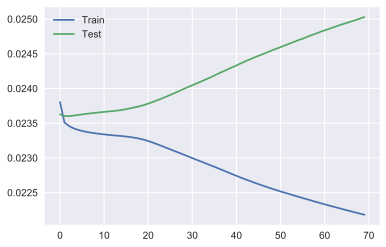

In [29]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

# 7)- Applying baseline model

In [30]:
df = pd.read_csv('testset3.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.shape

(80000, 25)

In [31]:
X = df.iloc[:,:-1].values          
y = df['m25'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2019)

In [33]:
from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# Predicting the Test set results
y_pred = clf_lr.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

In [36]:
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

MSE    : 0.02 
MAE    : 0.12 
RMSE   : 0.15 
R2     : 0.12 


Clearly Regression model has outperformed LSTM neural network

Regression model gives higher value of R2 and lower value of RMSE. So, loss function is reduced in linear regression model